In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
import seaborn as sns

In [2]:
from scipy.stats import gaussian_kde

In [3]:
data_path = r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/"
# data = glob.glob(data_path + '**.csv')
circ_params = pd.read_csv('../dataFolders/PaperPipelineOutput/CircleParameters/circle_parameters.csv')

# outfig = './dataFolders/Pap'

In [4]:
def getNameAndTrial(path):
    _, tail = os.path.split(path)
    name = tail[:-19]
    name
    
#     trial = name.split('_')[2]
    trial = "first"
    return(name, trial)

In [5]:
data = glob.glob(data_path +'*.csv')
# data

In [6]:
videoselection = pd.read_csv(r"../dataFolders/PaperPipelineOutput/FilteredTracks_v2/AllVideoNames.csv")
subset = videoselection.loc[videoselection.AutomatatedTracking == 'TRUE', :]

In [7]:
subset.head()

,Unnamed: 0,names,AutomatatedTracking
0,0,c-10_m10,TRUE
1,1,c-10_m11,TRUE
2,2,c-10_m12,TRUE
5,5,c-10_m16,TRUE
6,6,c-10_m17,TRUE


In [8]:
# count how many are being left out

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
for shape in shapes:
    co= subset[subset.names.str.contains(shape)].names.count()
#     print(co)
    inco = videoselection[videoselection.names.str.contains(shape)].names.count() - co
    print(shape[:-1] + ':' + str(inco) + ' out of ' + str(videoselection[videoselection.names.str.contains(shape)].names.count()))

c-1:7 out of 19
c-2:5 out of 21
c-3:5 out of 24
c-10:5 out of 22


In [9]:
df = pd.DataFrame([])
for eachfile in data:
    
    temp = pd.read_csv(eachfile)

    name, trial = getNameAndTrial(eachfile)
    
    if np.any(subset.names == name):
        p1 = pd.Series(data = [name] * len(temp), name = 'name')
        p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

        temp1 = pd.concat([temp, p1, p2], axis = 1)

        df = df.append(temp1)
        df = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]

## plot the distribution of angle

In [58]:
bin_center = np.linspace(0, 90,200)
delta = np.diff(bin_center)[0]

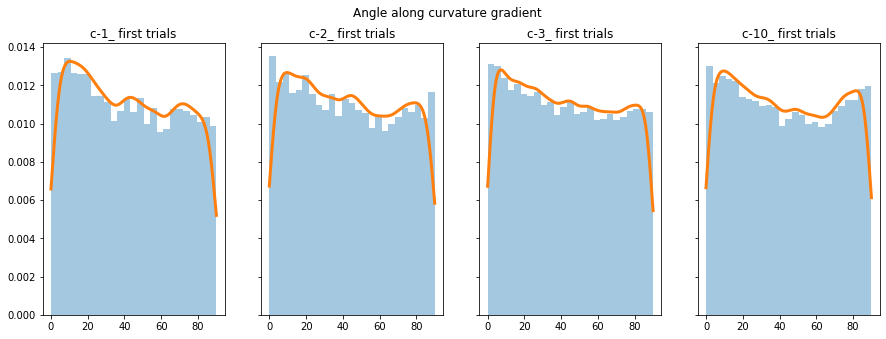

In [59]:
# draw the angle distribution
fig, ax = plt.subplots(1,4, figsize = (15,5), sharex = True, sharey = True)
ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
bins = 25

# df = df[df.radial_distance_normalized < 0.9]
# remove radial distances larger than 1.5r
df = df[df.radial_distance_normalized < 1.5]


for i, shape in enumerate(shapes):
    sub_df = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'first'), 'angle'].values
    sns.distplot(sub_df, ax = ax[i], bins = bins, kde = False, norm_hist = True)
    ax[i].set_title(shape + ' first trials')
    
    
    kde = gaussian_kde(sub_df)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    ax[i].plot(bin_center, temp, linewidth = 3)
#     ax[i+4].plot(sub_df, [0.001]*len(sub_df), '|')
#                 , color = colorScheme[cc])

#     sub_df = df.loc[(df.name.str.contains(shape)) & 
#                          (df.trial == 'last'), 'angle_savgol'].values
#     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
#     ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])
plt.suptitle('Angle along curvature gradient')
fig.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/angleDistributions_projection.png')

## draw the radial distribution distribution

In [60]:
bin_center = np.linspace(0, 1.5,200)
delta = np.diff(bin_center)[0]

c-1__1.0
c-2__0.9999999999999999
c-3__1.0
c-10__1.0


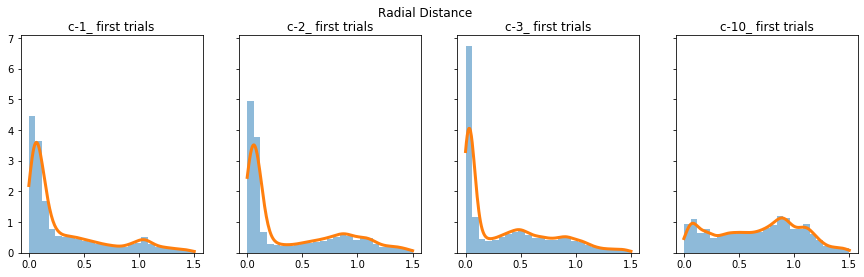

In [61]:
fig, ax = plt.subplots(1,4, figsize = (15,4), sharex = True, sharey = True)
ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
bins = 25

# remove radial distances larger than 1.5r
df = df[df.radial_distance_normalized < 1.5]

for i, shape in enumerate(shapes):
    sub_df = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'first'), 'radial_distance_normalized'].values
#     val, edges = np.histogram(sub_df, bins = bins)
    n , bins, _ = ax[i].hist(sub_df, bins = bins, density = 1, alpha = 0.5)
    ax[i].set_title(shape + ' first trials')
    
    
    # check normed function
    print(shape + '_' + str(np.sum(n*np.diff(bins))))
    
    kde = gaussian_kde(sub_df)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    ax[i].plot(bin_center, temp, linewidth = 3)
#     ax[i+4].plot(sub_df, [-0.001]*len(sub_df), '|')

#     sub_df = df.loc[(df.name.str.contains(shape)) & 
#                          (df.trial == 'last'), 'angle_savgol'].values
#     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
#     ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])
plt.suptitle('Radial Distance')
fig.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/Radial Distribution.png')

## draw the radial and angle distribution together

c-1_ has # datapoints: 8868
c-1_0.21980069058848836
c-2_ has # datapoints: 7633
c-2_0.22536378234949334
c-3_ has # datapoints: 19916
c-3_0.19207299735993413
c-10_ has # datapoints: 22894
c-10_0.1876634604273508


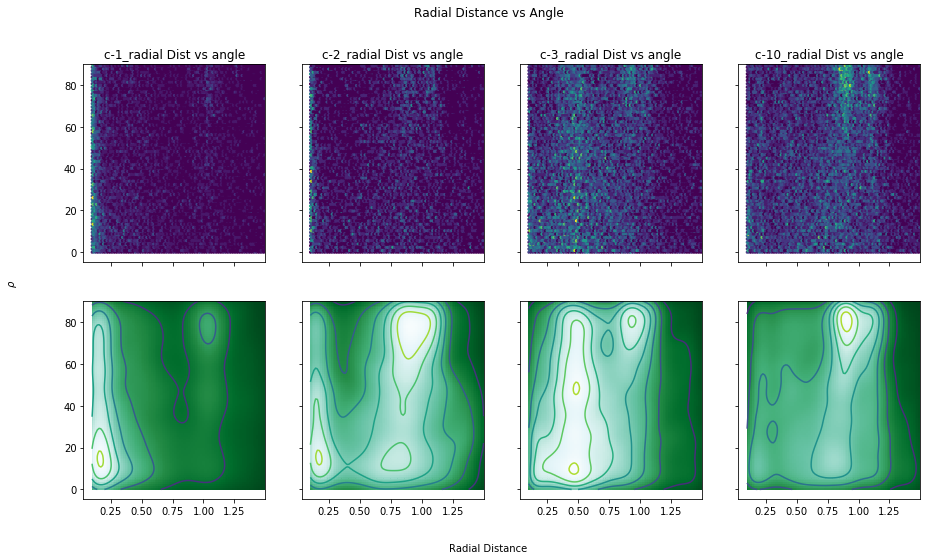

In [23]:
nrows = 2
f1, ax = plt.subplots(nrows,4, figsize = (15,4*nrows), sharex = True, sharey = True)

ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

# remove radial distances larger than 1.5r
df = df[(df.radial_distance_normalized < 1.5)
        & (df.radial_distance_normalized > 0.1) ]

for i, shape in enumerate(shapes):
    r = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'first'), 'radial_distance_normalized']
    
    print(shape + ' has # datapoints: ' + str(len(r)))
    
    angle = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'first'), 'angle']
    
    
#     ax[i].scatter(r, angle, alpha=0.01)
    
#     temp = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]
#     r = temp.loc[:, 'radial_distance_normalized']
#     angle = temp.loc[:, 'angle']
    ax[i].hexbin(r, angle)
    ax[i].set_title(shape + 'radial Dist vs angle')
    
    
    # perform a kernel density estimation
    
    m1 = r
    m2 = angle
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = gaussian_kde(values)
    print(shape + str(kernel.factor))
    Z = np.reshape(kernel(positions).T, X.shape)
    
    ax[i+4].pcolormesh(X, Y, Z.reshape(X.shape), cmap=plt.cm.BuGn_r)
    ax[i+4].contour(X, Y, Z.reshape(X.shape) )

    
    

#     sub_df = df.loc[(df.name.str.contains(shape)) & 
#                          (df.trial == 'last'), 'angle_savgol'].values
#     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
#     ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])

f1.text(0.5, 0.04, 'Radial Distance', ha='center', va='center')
f1.text(0.06, 0.5, r'$\rho$', ha='center', va='center', rotation='vertical')


plt.suptitle('Radial Distance vs Angle')
plt.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/anglevsRadialDist.png')




c-1_ has # datapoints: 8868
c-1_0.4396013811769767
c-2_ has # datapoints: 7633
c-2_0.45072756469898667
c-3_ has # datapoints: 19916
c-3_0.38414599471986827
c-10_ has # datapoints: 22894
c-10_0.3753269208547016
c-1_ has # datapoints: 8868
c-1_0.3140009865549834
c-2_ has # datapoints: 7633
c-2_0.3219482604992762
c-3_ has # datapoints: 19916
c-3_0.2743899962284774
c-10_ has # datapoints: 22894
c-10_0.2680906577533583
c-1_ has # datapoints: 8868
c-1_0.14653379372565892
c-2_ has # datapoints: 7633
c-2_0.1502425215663289
c-3_ has # datapoints: 19916
c-3_0.12804866490662276
c-10_ has # datapoints: 22894
c-10_0.12510897361823387
c-1_ has # datapoints: 8868
c-1_0.10990034529424418
c-2_ has # datapoints: 7633
c-2_0.11268189117474667
c-3_ has # datapoints: 19916
c-3_0.09603649867996707
c-10_ has # datapoints: 22894
c-10_0.0938317302136754


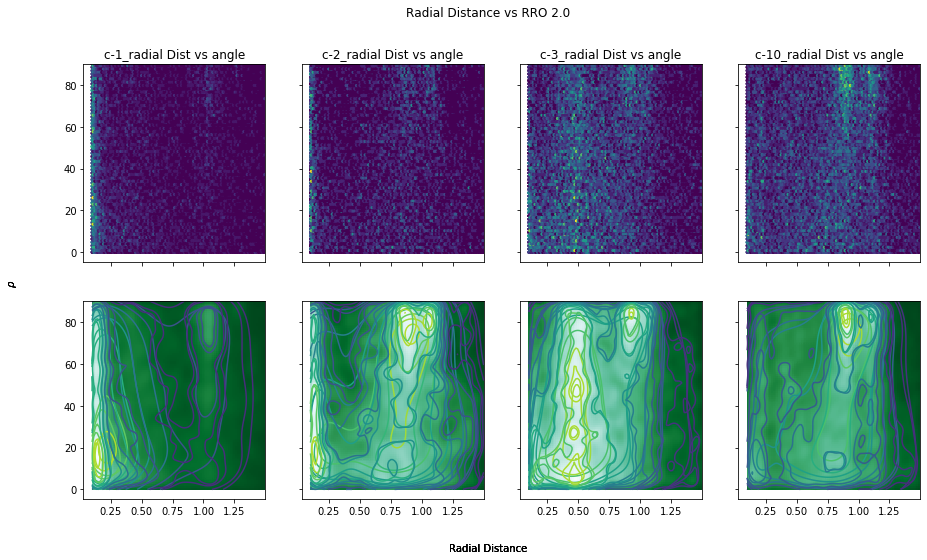

In [24]:
nrows = 2
f1, ax = plt.subplots(nrows,4, figsize = (15,4*nrows), sharex = True, sharey = True)
# f2, ax2 = plt.subplots(nrows,4, figsize = (15,4*nrows), sharex = True, sharey = True)
ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

# remove radial distances larger than 1.5r
df = df[(df.radial_distance_normalized < 1.5)
        & (df.radial_distance_normalized > 0.1) ]

ratio = [0.5, 0.7 , 1.5, 2.]

for ratio in ratio:
    for i, shape in enumerate(shapes):
        r = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'first'), 'radial_distance_normalized']

        print(shape + ' has # datapoints: ' + str(len(r)))

        angle = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'first'), 'angle']


    #     ax[i].scatter(r, angle, alpha=0.01)

    #     temp = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]
    #     r = temp.loc[:, 'radial_distance_normalized']
    #     angle = temp.loc[:, 'angle']
        ax[i].hexbin(r, angle)
        ax[i].set_title(shape + 'radial Dist vs angle')


        # perform a kernel density estimation

        m1 = r
        m2 = angle
        xmin = m1.min()
        xmax = m1.max()
        ymin = m2.min()
        ymax = m2.max()
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        values = np.vstack([m1, m2])
        kernel = gaussian_kde(values)
        kernel.set_bandwidth(bw_method=kernel.factor / ratio)
        print(shape + str(kernel.factor))
        Z = np.reshape(kernel(positions).T, X.shape)

        ax[i+4].pcolormesh(X, Y, Z.reshape(X.shape), cmap=plt.cm.BuGn_r)
        ax[i+4].contour(X, Y, Z.reshape(X.shape) )




    #     sub_df = df.loc[(df.name.str.contains(shape)) & 
    #                          (df.trial == 'last'), 'angle_savgol'].values
    #     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
    #     ax[i + 4].set_title(shape + ' last trials')

    #     ax[i].set_ylim([0, 0.045])
    f1.text(0.5, 0.04, 'Radial Distance', ha='center', va='center')
    f1.text(0.06, 0.5, r'$\rho$', ha='center', va='center', rotation='vertical')

    
#     plt.ylabel(r'$\rho$')
    plt.suptitle('Radial Distance vs RRO ' + str(ratio))
    name = '../dataFolders/PaperPipelineOutput/Figures/v2/anglevsRadialDist_' + str(ratio) + '.png'
    plt.savefig(name)